## Linear regression as limiting case of Ridge regression

#### Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity. 

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
# importing the r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
working_df = pd.read_csv(Path('Resources/CSV files/FINAL_DATABASE.csv'))
working_df.head(5)

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,NaN,NaN
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,NaN,NaN
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,NaN,NaN
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,NaN,NaN
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,NaN,NaN


In [3]:
working_df['Covid_New_Cases'] = working_df['Covid_New_Cases'].replace(np.nan, 0)
working_df['Covid_Death'] = working_df['Covid_Death'].replace(np.nan, 0)
working_df.head()

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,0.0,0.0
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,0.0,0.0
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,0.0,0.0
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,0.0,0.0
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,0.0,0.0


### Correlation matrix for each feature

In [4]:
corr_matrix = working_df.corr()
corr_matrix

,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
S_P Close,1.000000,0.029320,0.968992,0.281105,0.856495,0.844706,0.151783,0.986184,0.703428,0.605910,0.672633
S_P Volume,0.029320,1.000000,0.136782,-0.085583,-0.054061,0.026123,0.521131,0.111533,0.592586,0.160069,0.299465
Median Sale Price,0.968992,0.136782,1.000000,0.406611,0.841674,0.855680,0.217361,0.971922,0.747119,0.567067,0.656645
Homes Sold,0.281105,-0.085583,0.406611,1.000000,0.241420,0.538810,0.108287,0.315432,0.212076,-0.036085,0.009618
INFLATION_EXPECTATION,0.856495,-0.054061,0.841674,0.241420,1.000000,0.727047,-0.004432,0.811962,0.470486,0.548722,0.481307
SALES,0.844706,0.026123,0.855680,0.538810,0.727047,1.000000,0.083690,0.834314,0.612879,0.435129,0.460519
UNEMPLOYMENT,0.151783,0.521131,0.217361,0.108287,-0.004432,0.083690,1.000000,0.260097,0.500840,0.093783,0.494995
NAS Value,0.986184,0.111533,0.971922,0.315432,0.811962,0.834314,0.260097,1.000000,0.781757,0.592637,0.733128
NAS Volume,0.703428,0.592586,0.747119,0.212076,0.470486,0.612879,0.500840,0.781757,1.000000,0.484848,0.763211
Covid_New_Cases,0.605910,0.160069,0.567067,-0.036085,0.548722,0.435129,0.093783,0.592637,0.484848,1.000000,0.693726


## Split, scale, train & test

In [5]:
# Split our preprocessed data into our features and target arrays
y = working_df.UNEMPLOYMENT
X = working_df.drop(columns=["Date","UNEMPLOYMENT"])

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
len(X_test)


16

In [7]:
lr_test = y_test
len(y_test)

16

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
# Predicting the linear regression test set results
y_pred = lr.predict(X_test_scaled)
lr_pred = y_pred
lr_pred

array([ 7.47001995,  7.90333541,  3.84037407,  8.15426184,  4.82387318,
       13.50302494,  4.82860708,  4.10677316,  2.98940406,  6.71223062,
        3.60178448,  4.51039485, 12.81126559,  4.16142036,  3.61943084,
        3.05337007])

In [11]:
# predicting the accuracy score
lr_score=r2_score(y_test,y_pred)
print('linear regression r2 score is', lr_score)
print("mean_squared_error is ==",mean_squared_error(y_test, y_pred))
print("root_mean_squared error is ==",np.sqrt(mean_squared_error(y_test, y_pred)))

linear regression r2 score is -7.29995289807103
mean_squared_error is == 7.744569331102451
root_mean_squared error is == 2.782906633558239


In [12]:
rr = Ridge(alpha=1) 

In [13]:
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles

In [14]:
rr.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [15]:
# Predicting the ridge regression test set results
y_pred = rr.predict(X_test_scaled)
rr_pred = y_pred
rr_pred

array([ 8.06017574,  7.79568551,  3.34895464,  7.4838792 ,  5.32522244,
       13.01326706,  4.73406148,  3.64526014,  2.95042823,  6.54270333,
        4.14861641,  4.36967829, 12.28405319,  3.7278541 ,  3.95988029,
        3.31498742])

In [16]:
# predicting the accuracy score
rr_score=r2_score(y_test,y_pred)
print('Ridge r2 score is', rr_score)
print("mean_squared_error is ==",mean_squared_error(y_test, y_pred))
print("root_mean_squared error is ==",np.sqrt(mean_squared_error(y_test, y_pred)))

Ridge r2 score is -6.315842645319964
mean_squared_error is == 6.82630989331086
root_mean_squared error is == 2.612720783648888


In [17]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train_scaled, y_train)

Ridge(alpha=100)

In [18]:
# Predicting the ridge 100 test set results
y_pred = rr100.predict(X_test_scaled)
rr100_pred = y_pred
rr100_pred

array([6.84696335, 6.10165793, 4.30510391, 5.85620432, 5.00549285,
       7.51052807, 4.71424963, 4.58273269, 4.47455054, 6.05640593,
       4.64311088, 4.58589431, 7.05528012, 4.70187858, 4.65130709,
       4.44236899])

In [19]:
# predicting the accuracy score
rr100_score=r2_score(y_test,y_pred)
print('Ridge100 r2 score is', rr100_score)
print("mean_squared_error is ==",mean_squared_error(y_test, y_pred))
print("root_mean_squared error is ==",np.sqrt(mean_squared_error(y_test, y_pred)))

Ridge100 r2 score is -0.0562530592601056
mean_squared_error is == 0.9855748760369589
root_mean_squared error is == 0.9927612381821517


In [20]:
train_score=lr.score(X_train_scaled, y_train)
test_score=lr.score(X_test_scaled, y_test)
# score=r2_score(y_test,y_pred)

In [21]:
print('train score is', train_score)
print('test score is', test_score)


train score is 0.7179951292992881
test score is -7.29995289807103


In [22]:
Ridge_train_score = rr.score(X_train_scaled,y_train)
Ridge_test_score = rr.score(X_test_scaled, y_test)

In [23]:
print('Ridge train score is', Ridge_train_score)
print('Ridge test score is', Ridge_test_score)


Ridge train score is 0.695596605498382
Ridge test score is -6.315842645319964


In [24]:
Ridge_train_score100 = rr100.score(X_train_scaled,y_train)
Ridge_test_score100 = rr100.score(X_test_scaled, y_test)

In [25]:
print('Ridge_train_score100 is', Ridge_train_score100)
print('Ridge_test_score100', Ridge_test_score100)


Ridge_train_score100 is 0.34219119752413274
Ridge_test_score100 -0.0562530592601056


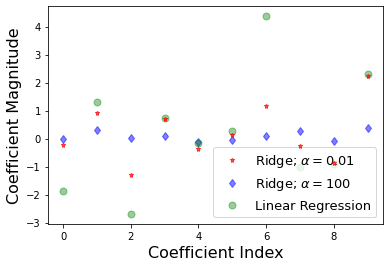

In [26]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

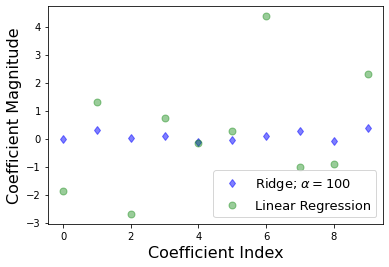

In [27]:
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

### Lasso

In [28]:
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected

In [29]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
working_df = pd.read_csv(Path('Resources/CSV files/FINAL_DATABASE.csv'))
working_df.head(5)

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,NaN,NaN
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,NaN,NaN
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,NaN,NaN
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,NaN,NaN
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,NaN,NaN


In [31]:
working_df['Covid_New_Cases'] = working_df['Covid_New_Cases'].replace(np.nan, 0)
working_df['Covid_Death'] = working_df['Covid_Death'].replace(np.nan, 0)
working_df.head()

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,0.0,0.0
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,0.0,0.0
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,0.0,0.0
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,0.0,0.0
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,0.0,0.0


In [32]:
# Split our preprocessed data into our features and target arrays
y = working_df.UNEMPLOYMENT
X = working_df.drop(columns=["Date","UNEMPLOYMENT"])

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42)

In [34]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
train_score=lasso.score(X_train_scaled,y_train)
test_score=lasso.score(X_test_scaled,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [36]:
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.2070408665473248
test score:  -0.14795721624342395
number of features used:  2


In [37]:
# The coefficient of determination R2 is defined as (1-u/v), where  is the residual sum of squares ((y_true - y_pred)** 2).sum() and  
# is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()
# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.

In [38]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train_scaled,y_train)

Lasso(alpha=0.01, max_iter=1000000.0)

In [39]:
train_score001=lasso001.score(X_train_scaled,y_train)
test_score001=lasso001.score(X_test_scaled,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)


In [40]:
print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.7110839779310338
test score for alpha =0.01:  -7.378186738640887
number of features used: for alpha =0.01: 9


In [41]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train_scaled,y_train)

Lasso(alpha=0.0001, max_iter=1000000.0)

In [42]:
train_score00001=lasso00001.score(X_train_scaled,y_train)
test_score00001=lasso00001.score(X_test_scaled,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)


In [43]:
print("training score for alpha=0.0001:", train_score00001) 
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.717994314369035
test score for alpha =0.0001:  -7.301145407835907
number of features used: for alpha =0.0001: 10


In [44]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
lr_train_score=lr.score(X_train_scaled,y_train)
lr_test_score=lr.score(X_test_scaled,y_test)

In [45]:
# Predicting the Test set results
y_pred = lr.predict(X_test_scaled)
lasso_pred = y_pred
lasso_pred

array([ 7.47001995,  7.90333541,  3.84037407,  8.15426184,  4.82387318,
       13.50302494,  4.82860708,  4.10677316,  2.98940406,  6.71223062,
        3.60178448,  4.51039485, 12.81126559,  4.16142036,  3.61943084,
        3.05337007])

In [46]:
print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)

LR training score: 0.7179951292992881
LR test score:  -7.29995289807103


In [47]:
# importing the r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2 score is', score)
print("mean_squared_error is ==",mean_squared_error(y_test, y_pred))
print("root_mean_squared error is ==",np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score is -7.29995289807103
mean_squared_error is == 7.744569331102451
root_mean_squared error is == 2.782906633558239


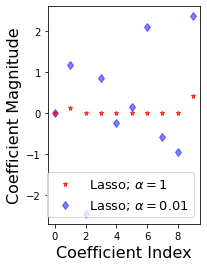

In [48]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

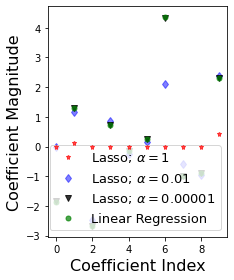

In [49]:
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

## Multiple linear regression

In [50]:
working_df = pd.read_csv(Path('Resources/CSV files/FINAL_DATABASE.csv'))
working_df.head(5)

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,NaN,NaN
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,NaN,NaN
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,NaN,NaN
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,NaN,NaN
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,NaN,NaN


In [51]:
working_df['Covid_New_Cases'] = working_df['Covid_New_Cases'].replace(np.nan, 0)
working_df['Covid_Death'] = working_df['Covid_Death'].replace(np.nan, 0)
working_df.head()

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,0.0,0.0
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,0.0,0.0
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,0.0,0.0
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,0.0,0.0
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,0.0,0.0


In [52]:
# Split our preprocessed data into our features and target arrays
y = working_df.UNEMPLOYMENT
X = working_df.drop(columns=["Date","UNEMPLOYMENT"])

In [53]:
X.shape

(62, 10)

In [54]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [55]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [56]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)


LinearRegression()

In [57]:
# Predicting the multiple regression test set results
y_pred = regressor.predict(X_test_scaled)
mult_pred = y_pred
mult_pred

array([ 7.47001995,  7.90333541,  3.84037407,  8.15426184,  4.82387318,
       13.50302494,  4.82860708,  4.10677316,  2.98940406,  6.71223062,
        3.60178448,  4.51039485, 12.81126559,  4.16142036,  3.61943084,
        3.05337007])

In [58]:
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2 score is', score)
print("mean_squared_error is ==",mean_squared_error(y_test, y_pred))
print("root_mean_squared error is ==",np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score is -7.29995289807103
mean_squared_error is == 7.744569331102451
root_mean_squared error is == 2.782906633558239


In [59]:
predictions_df = pd.DataFrame()
predictions_df['Y_test'] = lr_test.tolist()
predictions_df['linear_regression'] = lr_pred.tolist()
predictions_df['multiple_regression'] = mult_pred.tolist()
predictions_df['lasso'] = lasso_pred.tolist()
predictions_df['ridge'] = rr_pred.tolist()
predictions_df['ridge100'] = rr100_pred.tolist()
predictions_df.head()

,Y_test,linear_regression,multiple_regression,lasso,ridge,ridge100
0,6.0,7.470020,7.470020,7.470020,8.060176,6.846963
1,4.7,7.903335,7.903335,7.903335,7.795686,6.101658
2,4.7,3.840374,3.840374,3.840374,3.348955,4.305104
3,4.6,8.154262,8.154262,8.154262,7.483879,5.856204
4,4.3,4.823873,4.823873,4.823873,5.325222,5.005493


In [60]:
predictions_df.to_csv('Resources/CSV files/predictions.csv')

### Neural Network model

In [61]:
# A good rule of thumb for a basic neural network is to have two to 
# three times the amount of neurons in the hidden layer as the number of inputs.
# Our FINAL_DATAFRAME has 10 input features (columns) of data.

In [62]:
working_df = pd.read_csv(Path('Resources/CSV files/FINAL_DATABASE.csv'))
working_df.head(5)

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,NaN,NaN
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,NaN,NaN
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,NaN,NaN
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,NaN,NaN
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,NaN,NaN


In [63]:
working_df['Covid_New_Cases'] = working_df['Covid_New_Cases'].replace(np.nan, 0)
working_df['Covid_Death'] = working_df['Covid_Death'].replace(np.nan, 0)
working_df.head()

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,0.0,0.0
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,0.0,0.0
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,0.0,0.0
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,0.0,0.0
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,0.0,0.0


In [64]:
# Split our preprocessed data into our features and target arrays
y = working_df.UNEMPLOYMENT
X = working_df.drop(columns=["Date","UNEMPLOYMENT"])

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
len(X_test)

16

In [66]:
len(y_test)

16

In [67]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [68]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 20

nn_A = tf.keras.models.Sequential()

# First hidden layer
nn_A.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="LeakyReLU"))

# Second hidden layer
nn_A.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="LeakyReLU"))

# Output layer
nn_A.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                330       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 971
Trainable params: 971
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [70]:
# Compile the model
nn_A.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=10)

In [71]:
# Train the model
fit_model = nn_A.fit(X_train_scaled,y_train,epochs=15,callbacks=[cp_callback])

Epoch 1/15
2/2 [==============================] - 1s 4ms/step - loss: 54.4318 - accuracy: 0.0000e+00
Epoch 2/15
2/2 [==============================] - 0s 8ms/step - loss: 53.3160 - accuracy: 0.0000e+00
Epoch 3/15
2/2 [==============================] - 0s 6ms/step - loss: 50.3962 - accuracy: 0.0000e+00
Epoch 4/15
2/2 [==============================] - 0s 7ms/step - loss: 48.4631 - accuracy: 0.0000e+00
Epoch 5/15
1/2 [==============>...............] - ETA: 0s - loss: 46.0568 - accuracy: 0.0000e+00
Epoch 5: saving model to checkpoints\weights.05.hdf5
2/2 [==============================] - 0s 50ms/step - loss: 41.7364 - accuracy: 0.0000e+00
Epoch 6/15
2/2 [==============================] - 0s 8ms/step - loss: 37.6119 - accuracy: 0.0000e+00
Epoch 7/15
2/2 [==============================] - 0s 6ms/step - loss: 32.4177 - accuracy: 0.0000e+00
Epoch 8/15
2/2 [==============================] - 0s 16ms/step - loss: 29.2393 - accuracy: 0.0000e+00
Epoch 9/15
2/2 [==============================] - 0

In [72]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_A.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.6765 - accuracy: 0.0000e+00 - 256ms/epoch - 256ms/step
Loss: 0.676466703414917, Accuracy: 0.0


<AxesSubplot:>

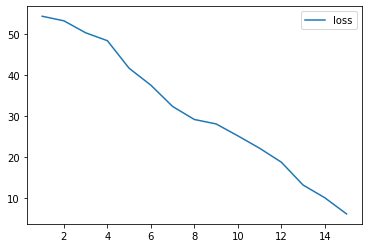

In [73]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

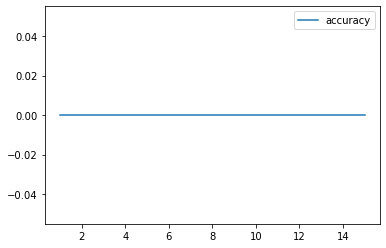

In [74]:
# Plot the accuracy
history_df.plot(y="accuracy")

### Second attempt - adding a third hidden layer, adding more epochs, more nodes

In [75]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 40
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20

nn_B = tf.keras.models.Sequential()

# First hidden layer
nn_B.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_B.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="LeakyReLU"))

# Third hidden layer
nn_B.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn_B.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn_B.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                440       
                                                                 
 dense_4 (Dense)             (None, 20)                820       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Compile the model
nn_B.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=10)

In [77]:
# Train the model
fit_model_B = nn_B.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
2/2 [==============================] - 1s 5ms/step - loss: 3.3672 - accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: -6.1609 - accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: -15.0693 - accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: -18.9732 - accuracy: 0.0000e+00
Epoch 5/50
1/2 [==============>...............] - ETA: 0s - loss: -29.9508 - accuracy: 0.0000e+00
Epoch 5: saving model to checkpoints\weights.05.hdf5
2/2 [==============================] - 0s 84ms/step - loss: -25.4821 - accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: -35.1150 - accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 9ms/step - loss: -45.5946 - accuracy: 0.0000e+00
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: -47.9350 - accuracy: 0.0000e+00
Epoch 9/50
2/2 [==============================

In [78]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_B.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: -5.3468e+01 - accuracy: 0.0000e+00 - 259ms/epoch - 259ms/step
Loss: -53.4676399230957, Accuracy: 0.0


<AxesSubplot:>

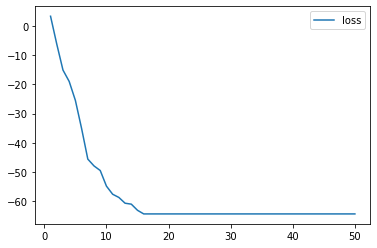

In [79]:
# Create a DataFrame containing training history
history_df_B = pd.DataFrame(fit_model_B.history, index=range(1,len(fit_model_B.history["loss"])+1))

# Plot the loss
history_df_B.plot(y="loss")

<AxesSubplot:>

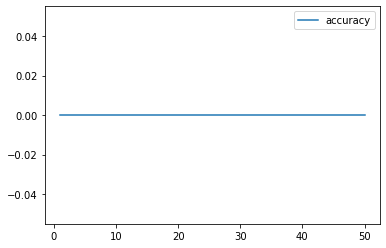

In [80]:
# Plot the accuracy
history_df_B.plot(y="accuracy")

### Now a third attempt without the Covid-19 data

In [81]:
working_df = pd.read_csv(Path('Resources/CSV files/FINAL_DATABASE.csv'))
working_df.head(5)

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,NaN,NaN
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,NaN,NaN
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,NaN,NaN
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,NaN,NaN
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,NaN,NaN


In [82]:
# Split our preprocessed data into our features and target arrays
y = working_df.UNEMPLOYMENT
X = working_df.drop(columns=["Date","UNEMPLOYMENT", "Covid_New_Cases", "Covid_Death"])

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
len(X_test)

16

In [84]:
len(y_test)

16

In [85]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [86]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 40
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20

nn_C = tf.keras.models.Sequential()

# First hidden layer
nn_C.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_C.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="LeakyReLU"))

# Third hidden layer
nn_C.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn_C.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn_C.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 40)                360       
                                                                 
 dense_8 (Dense)             (None, 20)                820       
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Compile the model
nn_C.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=10)

In [88]:
# Train the model
fit_model_C = nn_C.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
2/2 [==============================] - 1s 5ms/step - loss: 13.5143 - accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 2.1297 - accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 9ms/step - loss: -3.6825 - accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 9ms/step - loss: -9.2589 - accuracy: 0.0000e+00
Epoch 5/50
1/2 [==============>...............] - ETA: 0s - loss: -9.3881 - accuracy: 0.0000e+00
Epoch 5: saving model to checkpoints\weights.05.hdf5
2/2 [==============================] - 0s 73ms/step - loss: -11.7989 - accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 7ms/step - loss: -14.5715 - accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 9ms/step - loss: -21.5507 - accuracy: 0.0000e+00
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: -24.3540 - accuracy: 0.0000e+00
Epoch 9/50
2/2 [==============================] -

In [89]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_C.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: -5.3468e+01 - accuracy: 0.0000e+00 - 212ms/epoch - 212ms/step
Loss: -53.4676399230957, Accuracy: 0.0


<AxesSubplot:>

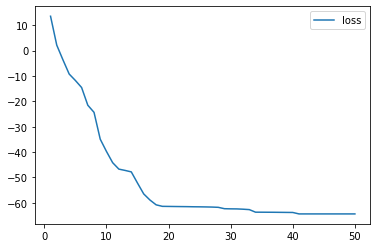

In [90]:
# Create a DataFrame containing training history
history_df_C = pd.DataFrame(fit_model_C.history, index=range(1,len(fit_model_C.history["loss"])+1))

# Plot the loss
history_df_C.plot(y="loss")

<AxesSubplot:>

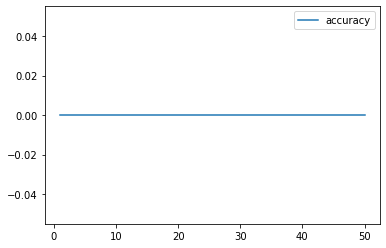

In [91]:
# Plot the accuracy
history_df_C.plot(y="accuracy")